In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('seaborn')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Loading Dataset

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.shape

(891, 12)

In [4]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Dealing with Duplicate Values

In [5]:
data.duplicated().sum()

0

# Data Visualization

<AxesSubplot:xlabel='Survived', ylabel='count'>

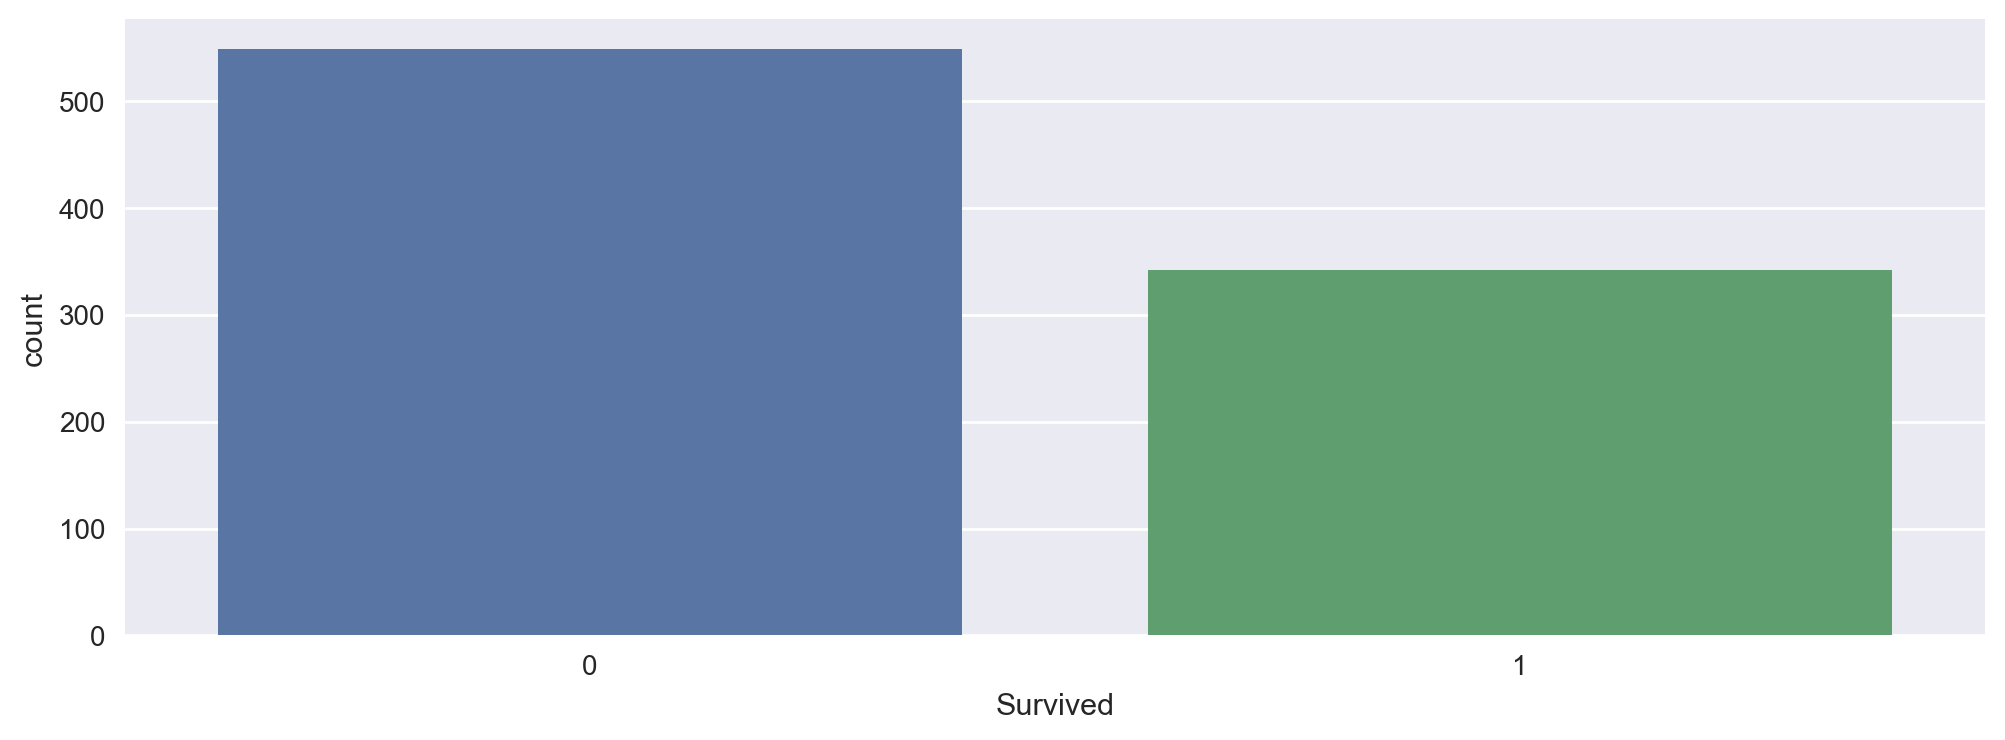

In [6]:
plt.figure(figsize = (12,4),dpi = 200)
sns.countplot('Survived',data = data)

# Pie Chart

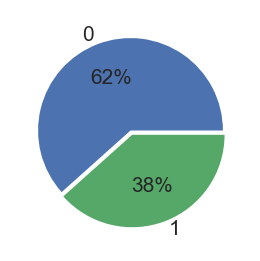

In [7]:
explode = [0, 0.05]
plt.figure(figsize = (9,2), dpi = 150)
plt.pie(data.Survived.value_counts(), labels = data.Survived.value_counts().index,autopct='%.0f%%',explode=explode )
plt.show()

<AxesSubplot:xlabel='Survived', ylabel='count'>

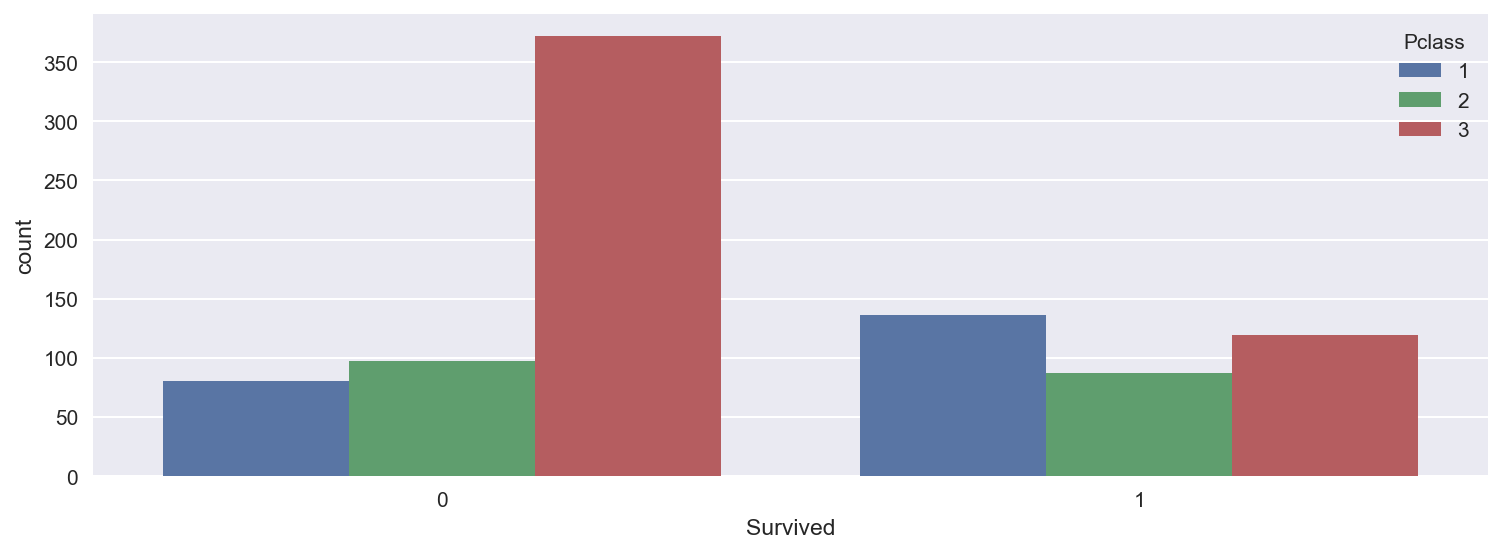

In [8]:
plt.figure(figsize = (12,4),dpi = 150)
sns.countplot('Survived',hue = 'Pclass', data = data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

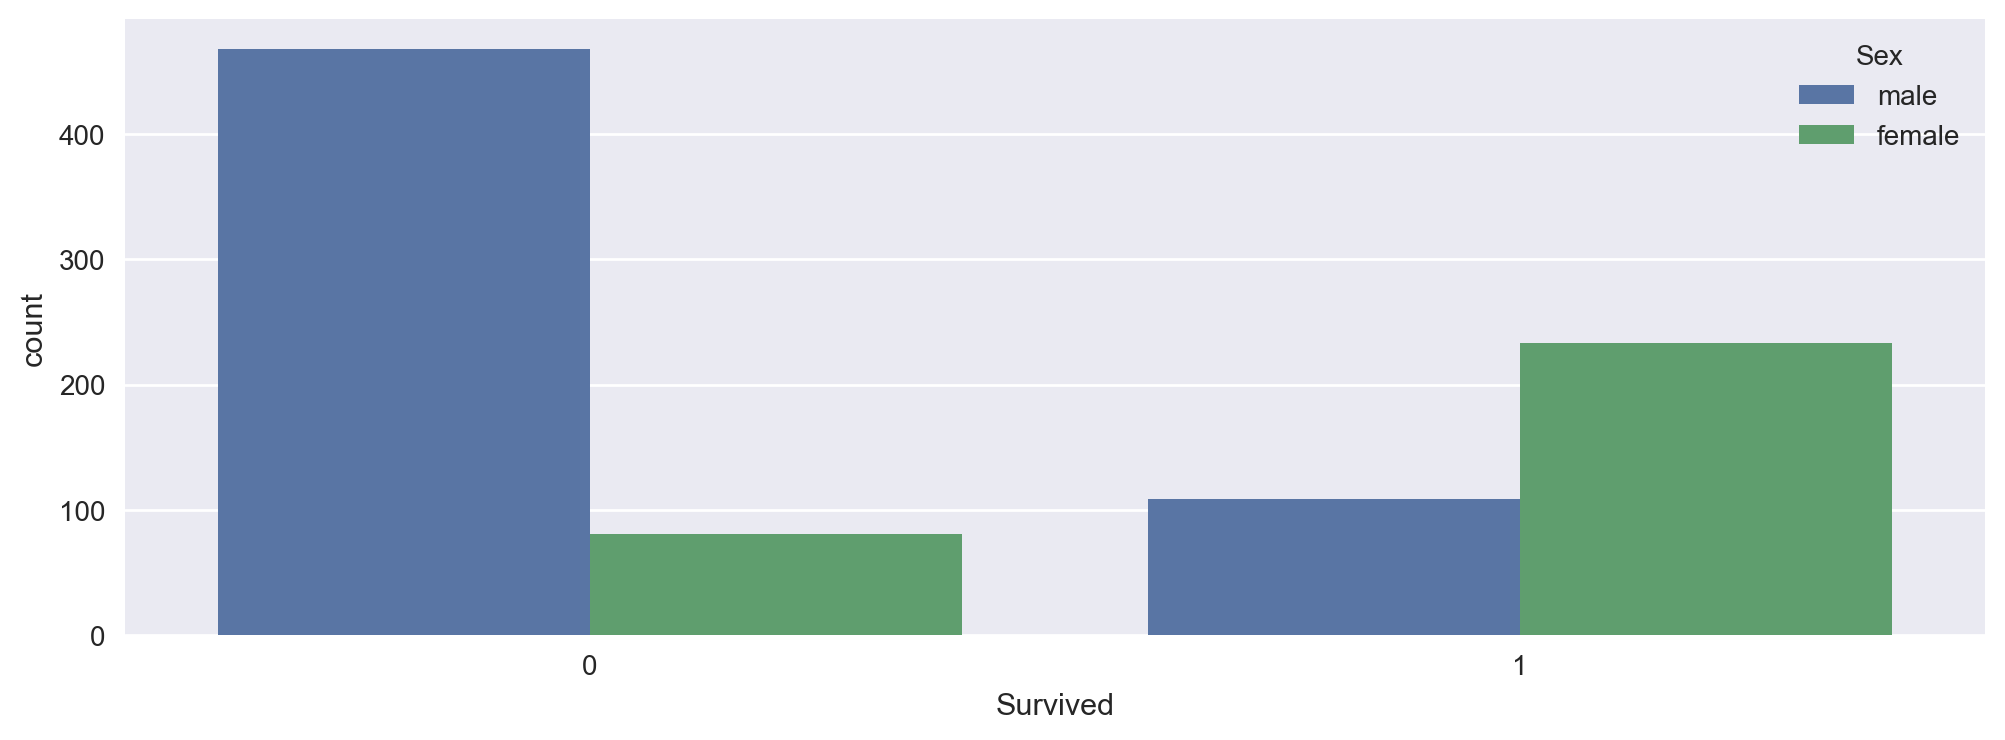

In [9]:
plt.figure(figsize = (12,4),dpi = 200)
sns.countplot('Survived',hue ='Sex',data = data)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

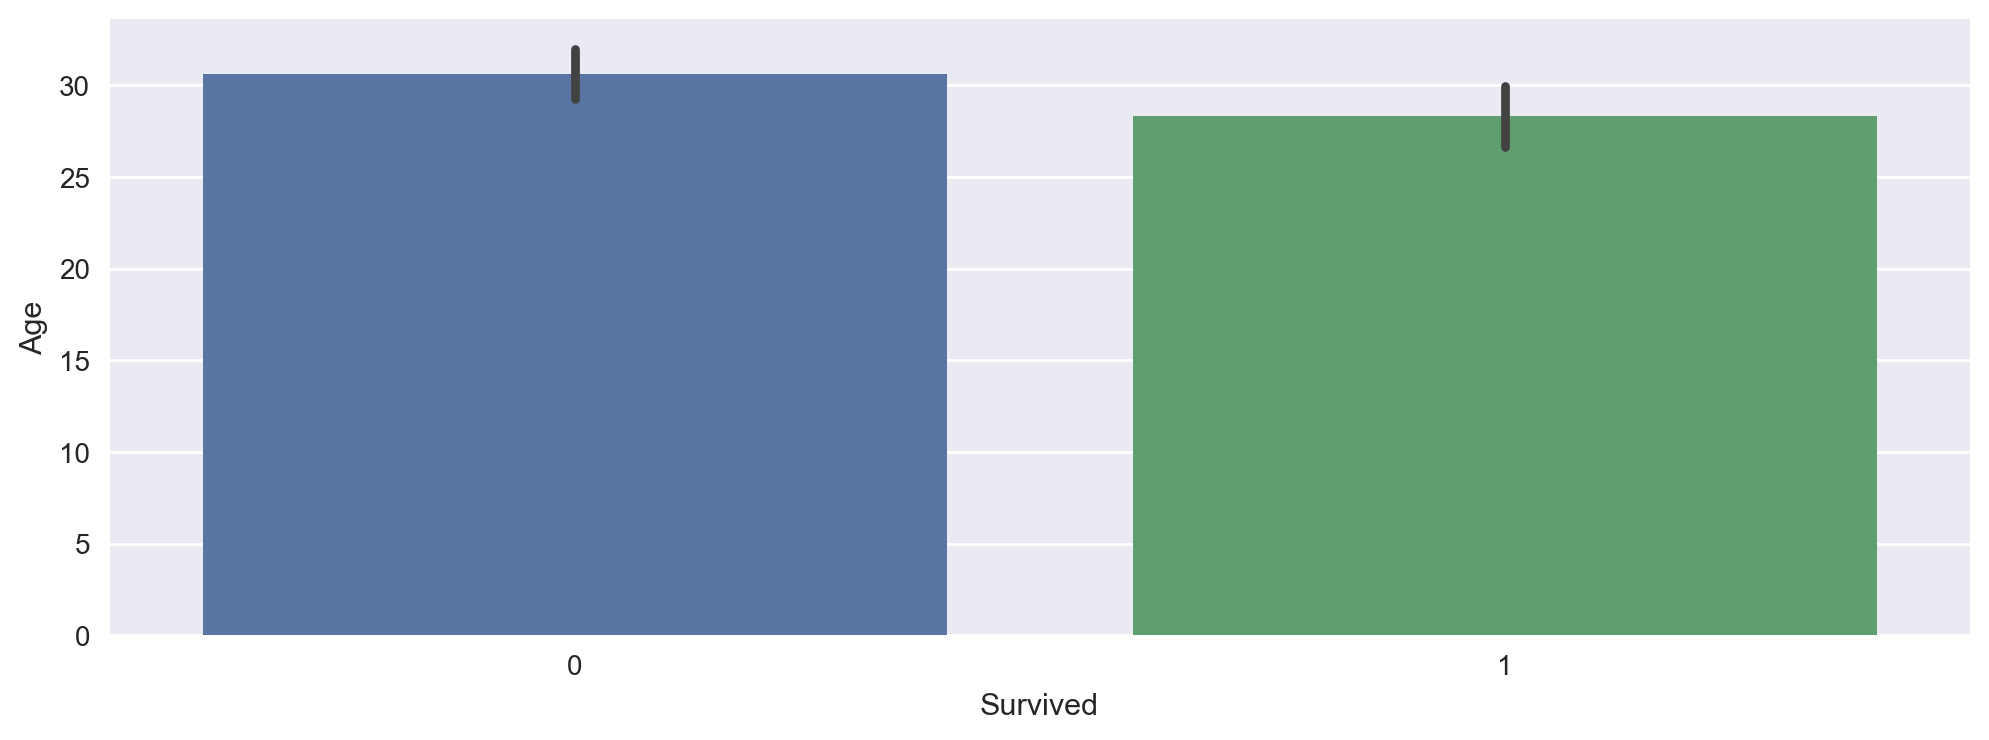

In [10]:
plt.figure(figsize = (12,4),dpi = 200)
sns.barplot('Survived','Age',data = data)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

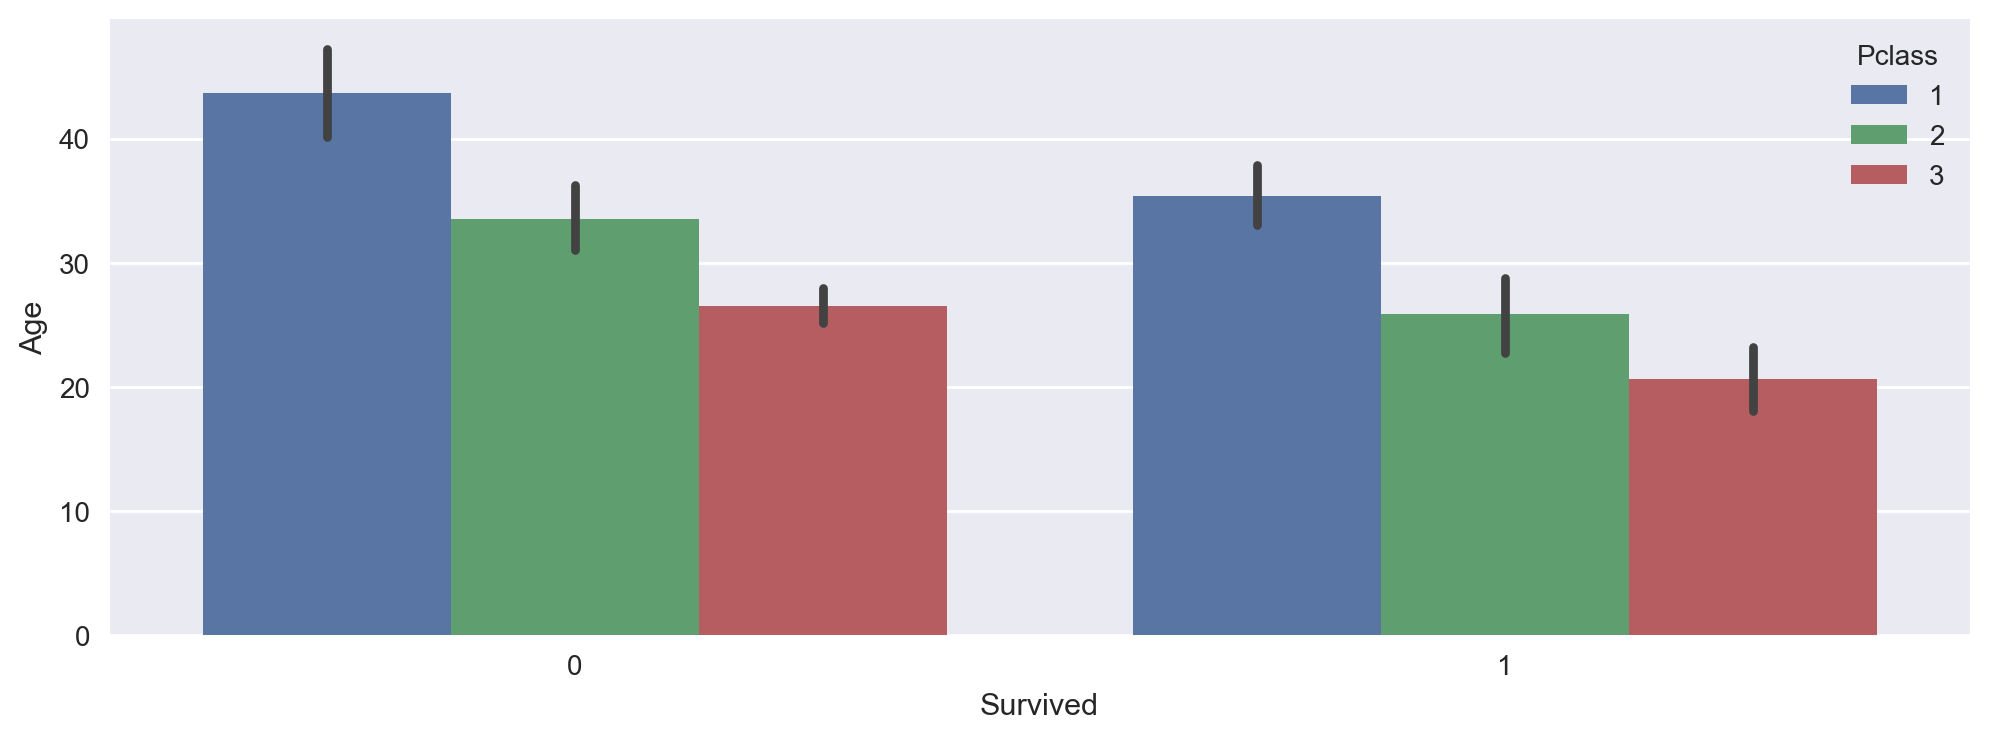

In [11]:
plt.figure(figsize = (12,4),dpi = 200)
sns.barplot('Survived','Age',data = data, hue = 'Pclass' )

<AxesSubplot:xlabel='Survived', ylabel='count'>

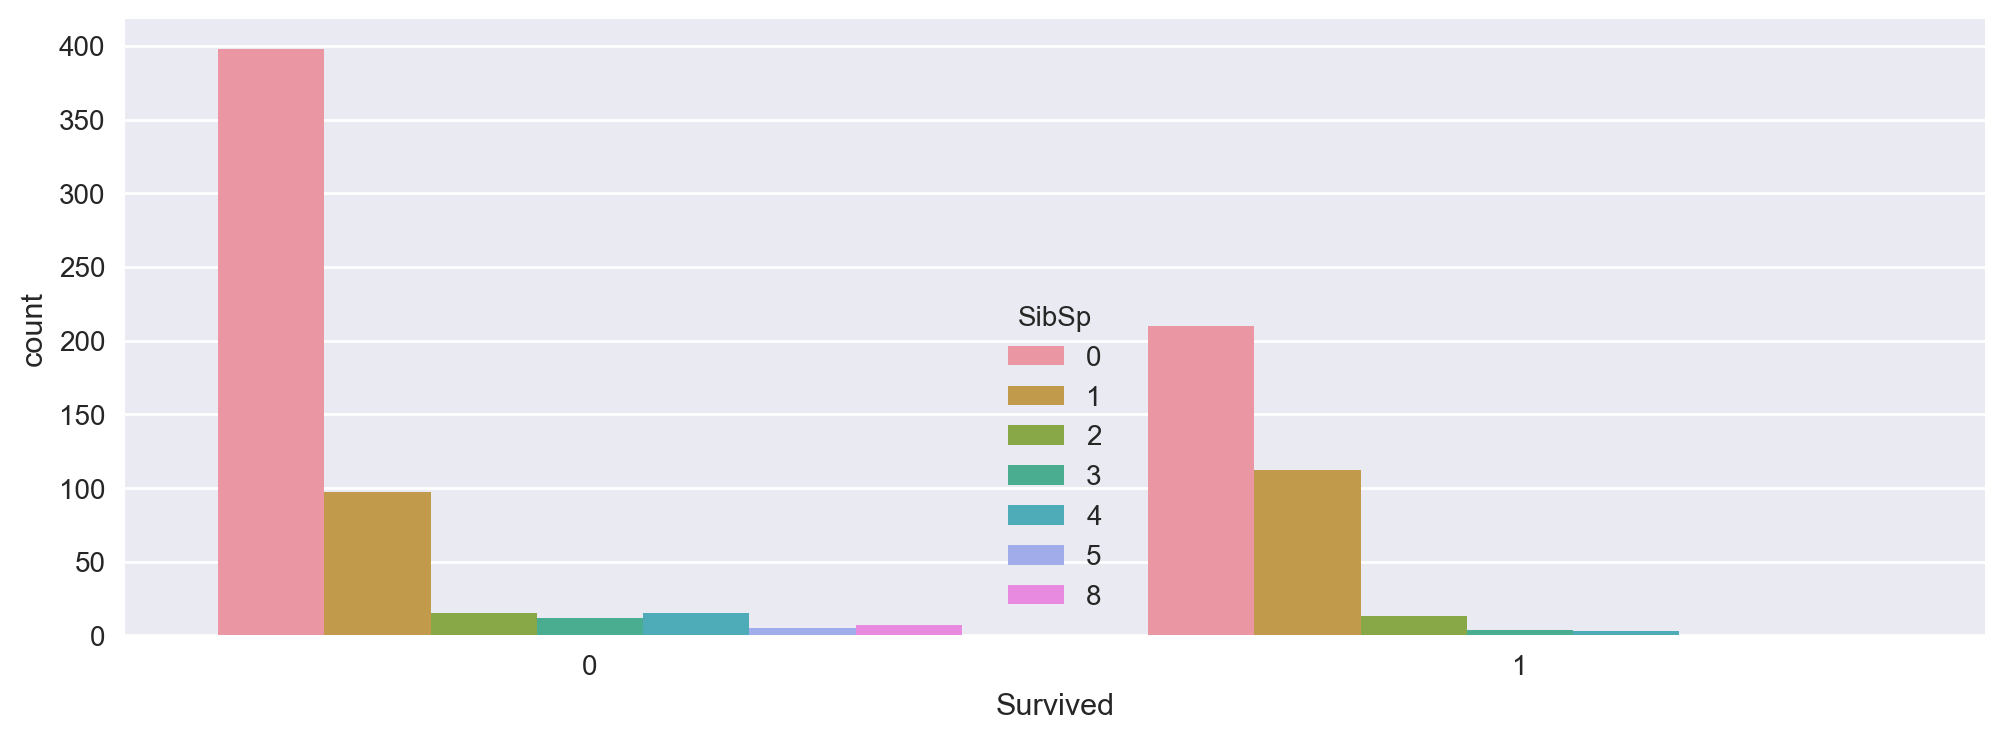

In [12]:
plt.figure(figsize = (12,4),dpi = 200)
sns.countplot('Survived',hue ='SibSp',data = data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

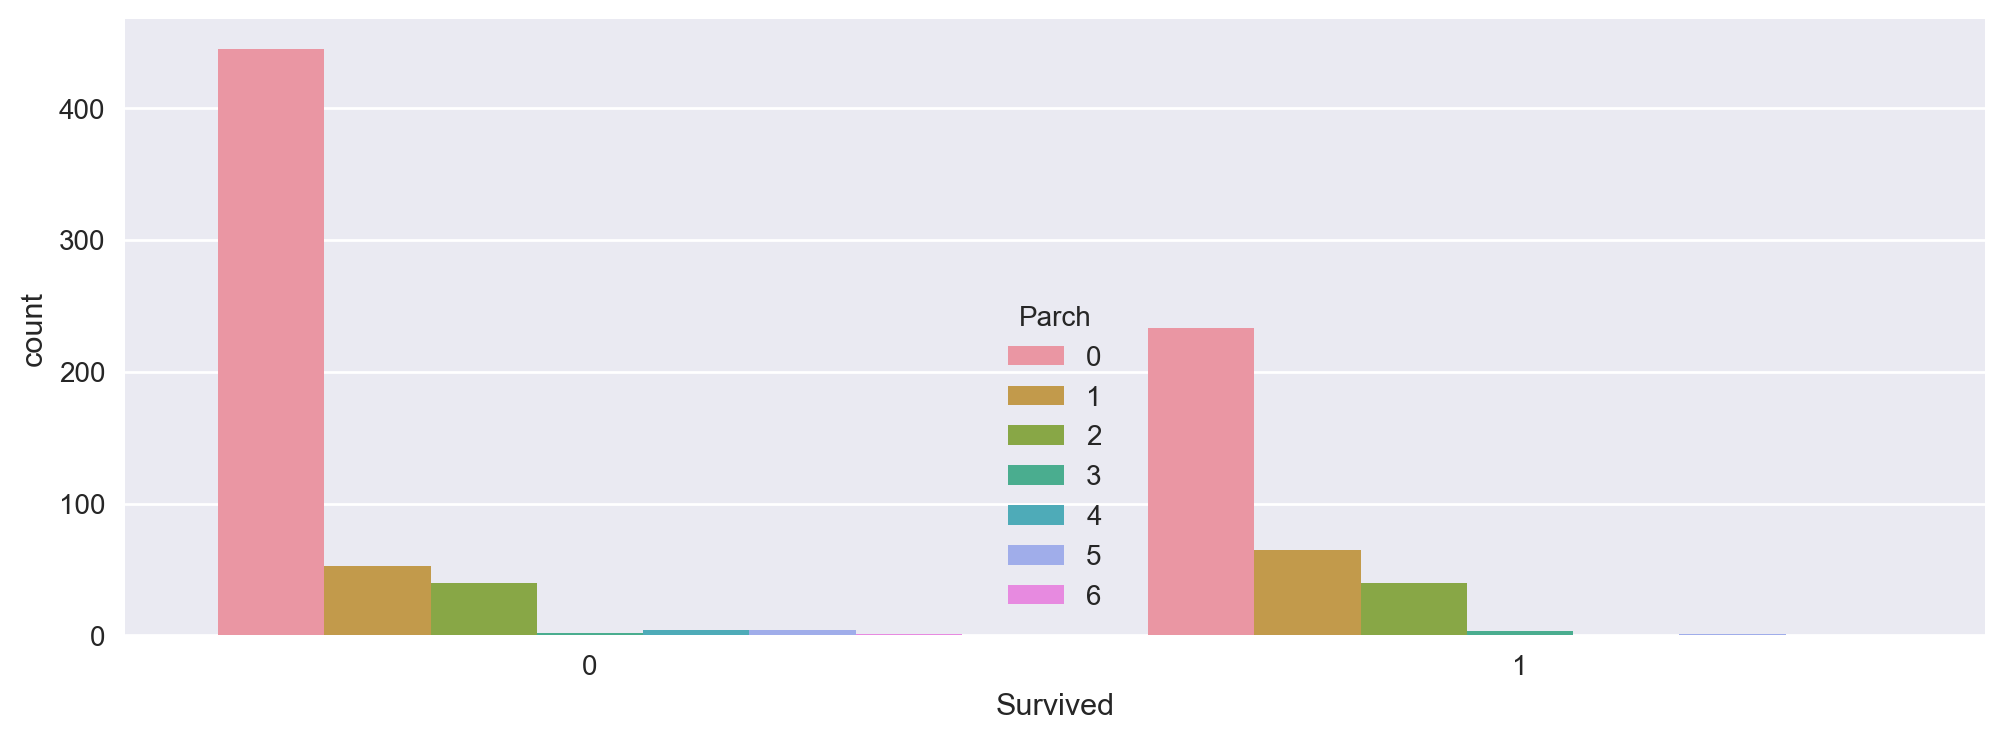

In [13]:
plt.figure(figsize = (12,4),dpi = 200)
sns.countplot('Survived',hue ='Parch',data = data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

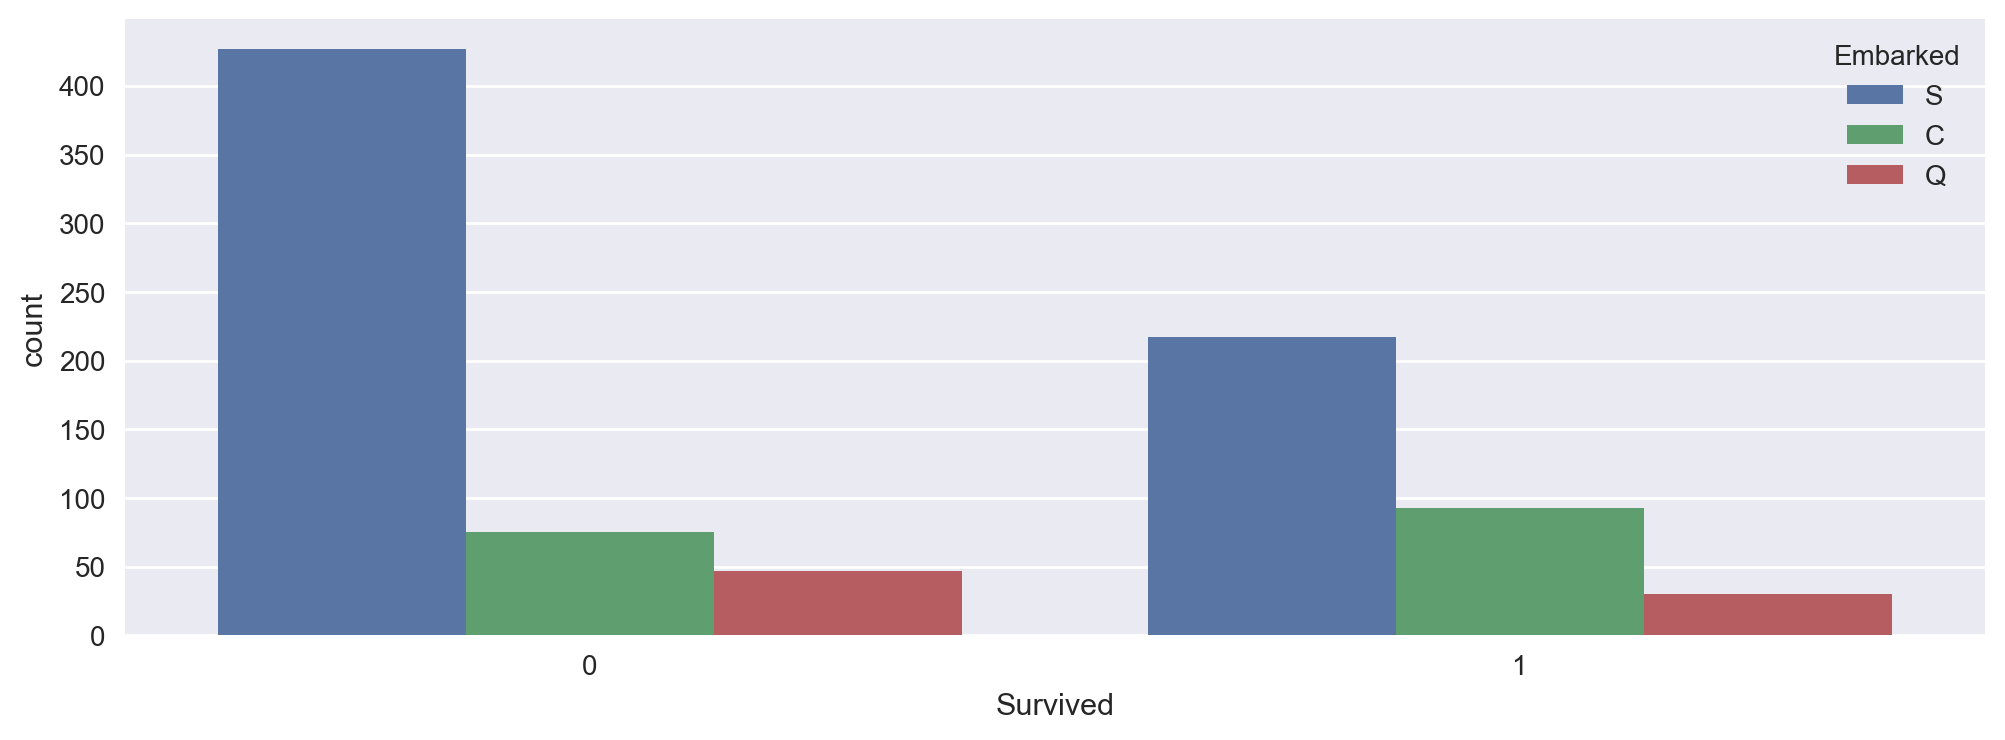

In [14]:
plt.figure(figsize = (12,4),dpi = 200)
sns.countplot('Survived',hue ='Embarked',data = data)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

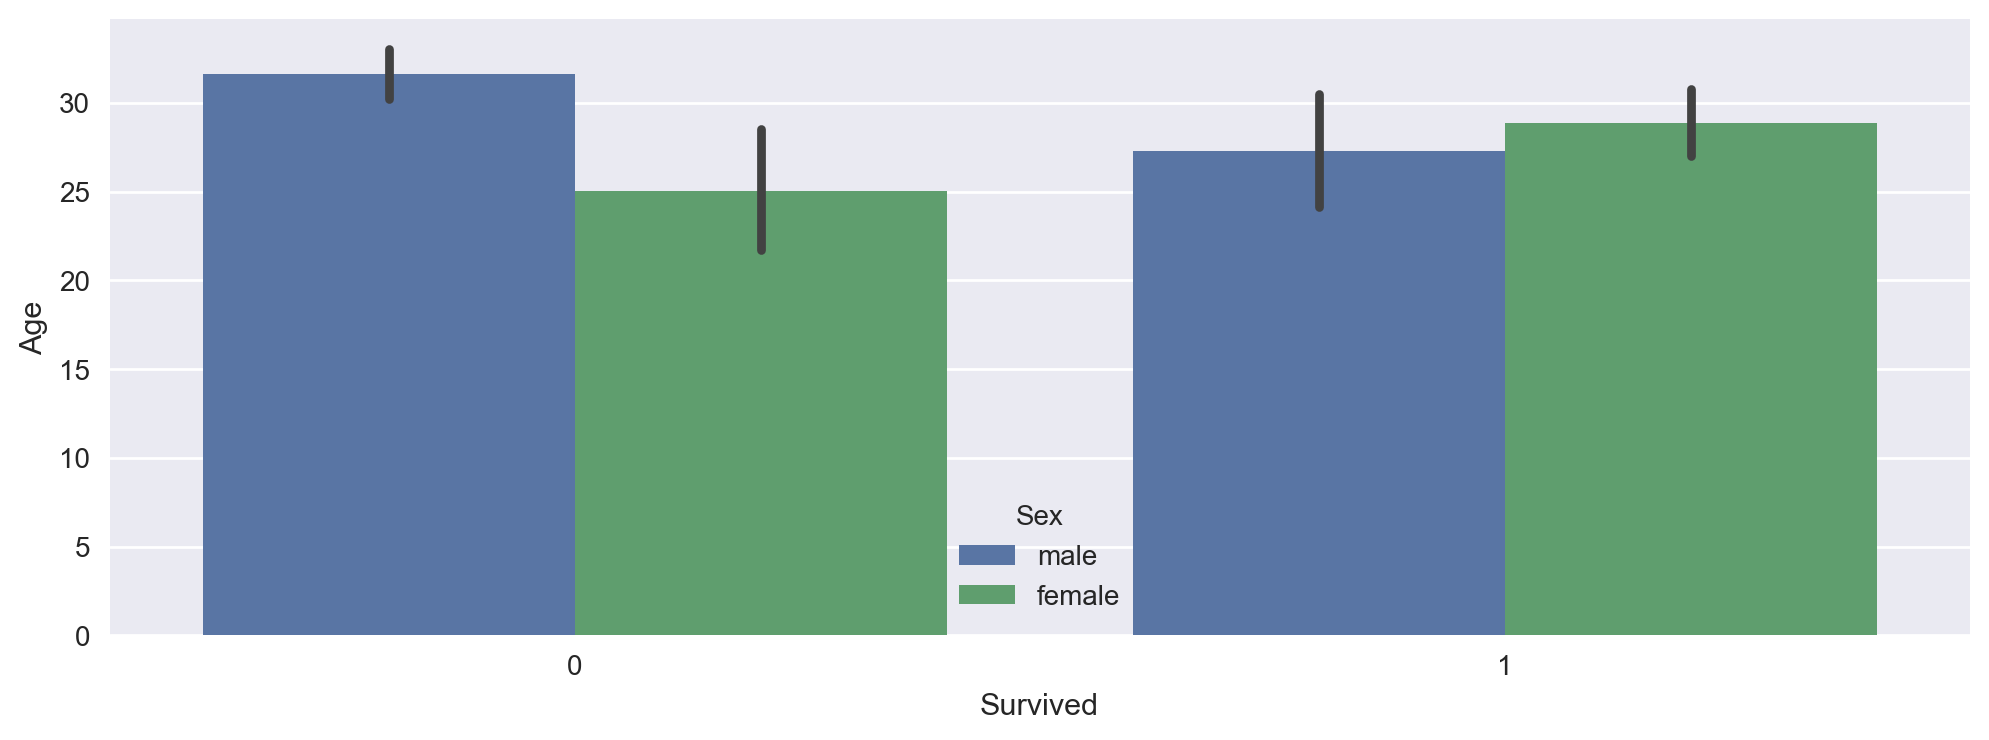

In [15]:
plt.figure(figsize = (12,4),dpi = 200)
sns.barplot('Survived','Age',data = data, hue = 'Sex' )

# Splitting Numerical and Categorical Values

In [16]:
data_num = data.select_dtypes(include = [np.number])
data_cat = data.select_dtypes(include = ['object'])

In [17]:
data_num

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [18]:
data_cat

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


# Dealing with Null Values

In [19]:
data_num = data_num[['Survived','Pclass','Age','SibSp','Parch','Fare']]

In [20]:
data_num.isnull().sum()

Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [21]:
data_num.Age.replace(np.nan, data_num.Age.median(),inplace = True)

In [22]:
data_num.isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

# Plotting Box Plot for all Numerical Columns

<AxesSubplot:>

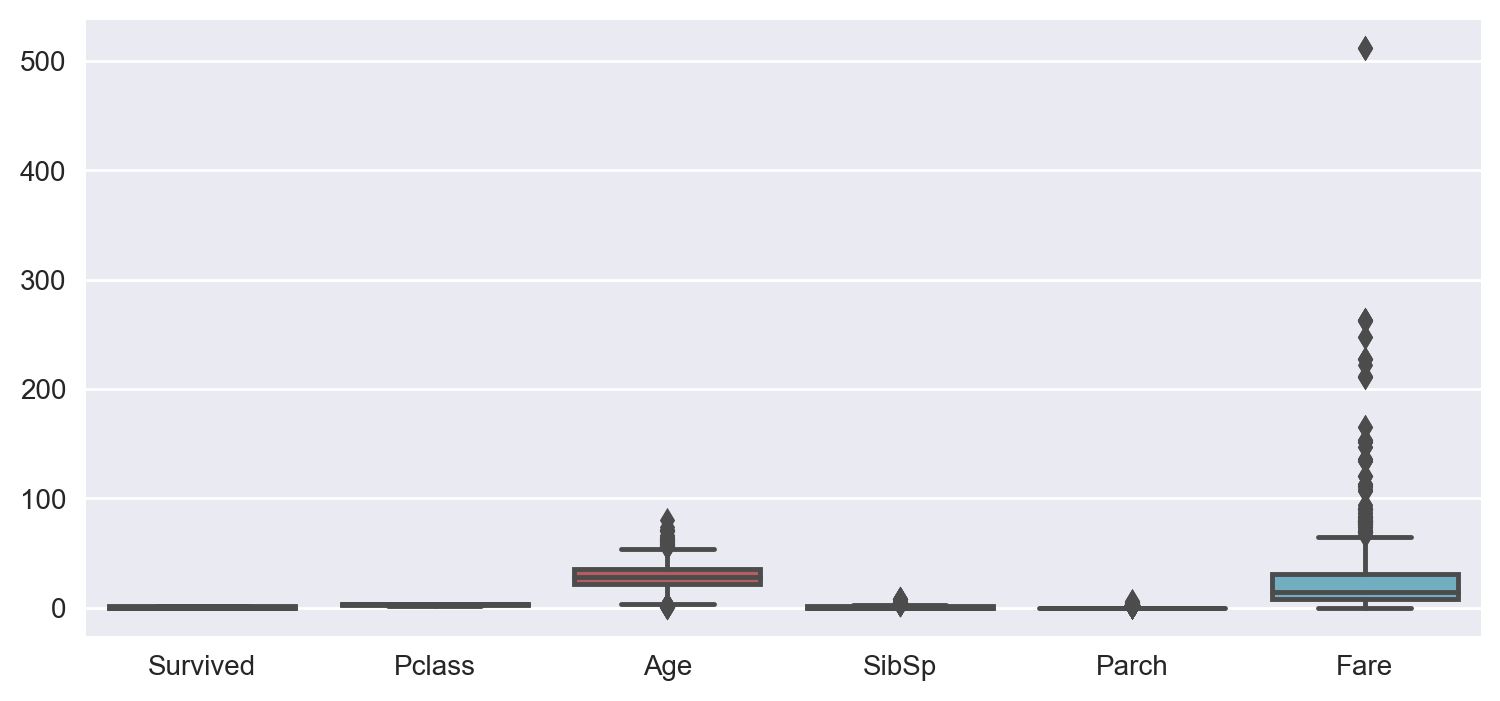

In [23]:
plt.figure(figsize = (9,4), dpi = 200)
sns.boxplot(data = data_num)

# Removing the datapoints which are more than 75% and less than 25%

In [24]:
data_num.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

# Plotting Boxplot before removal

<AxesSubplot:ylabel='Fare'>

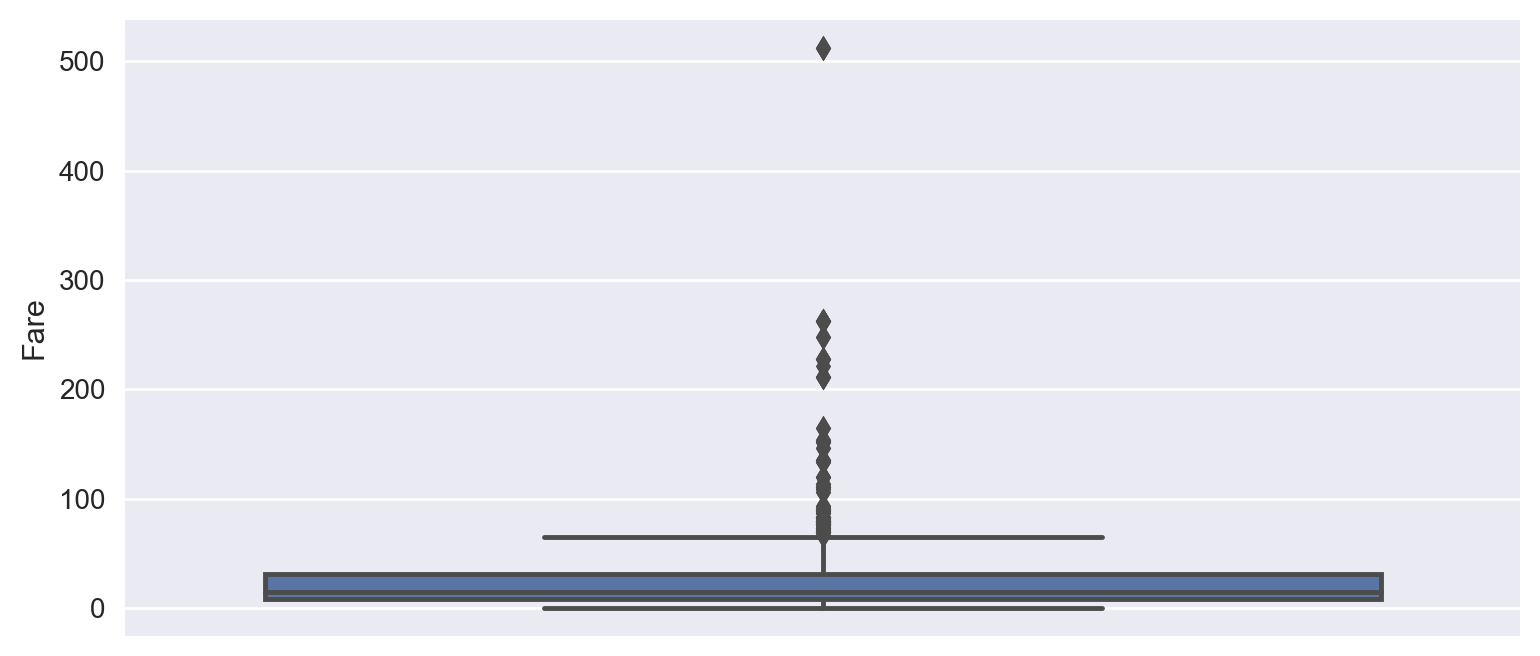

In [25]:
plt.figure(figsize = (9,4), dpi = 200)
sns.boxplot(y = data_num.Fare)

In [26]:
data_f = data_num[(data_num['Fare']>7.91)&(data_num['Fare']<31.00)]

# Plotting Boxplot after removal

<AxesSubplot:ylabel='Fare'>

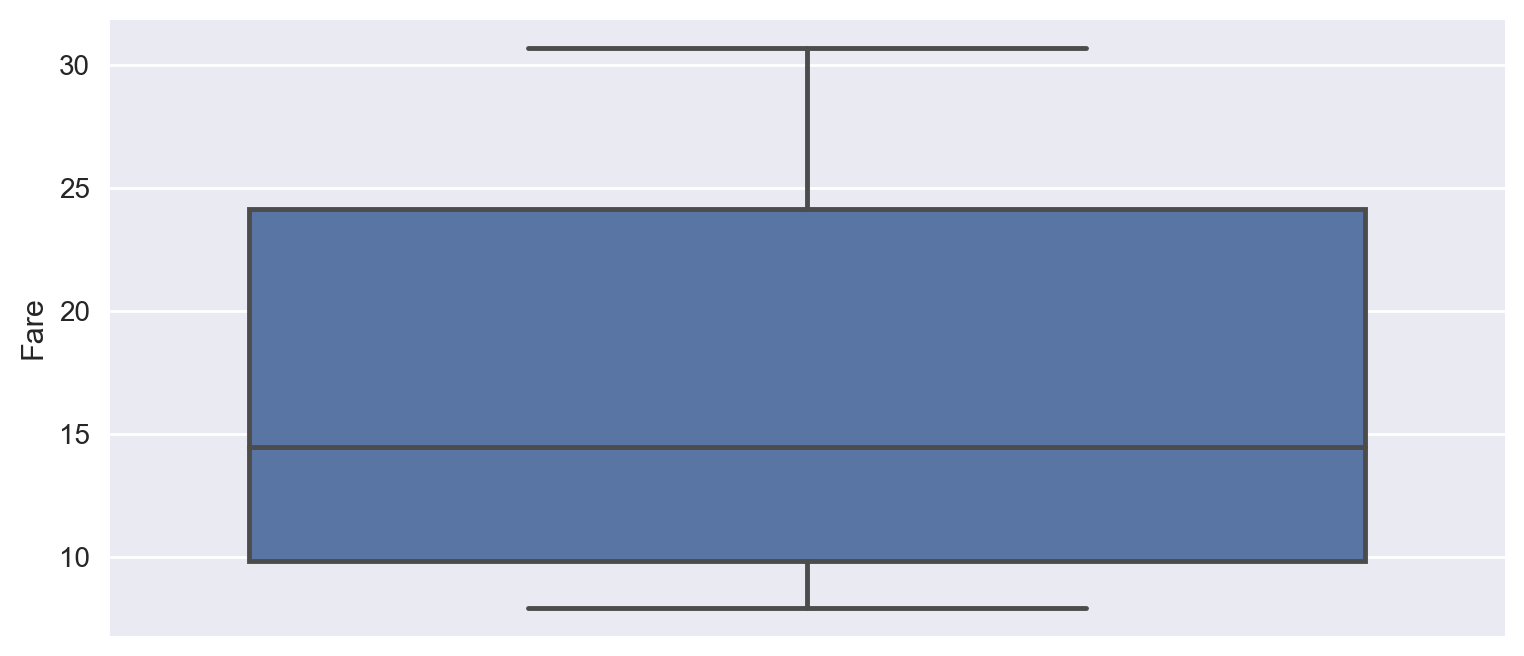

In [27]:
plt.figure(figsize = (9,4), dpi = 200)
sns.boxplot(y = data_f.Fare)

# MinMax Scaler

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
sc=scaler.fit(data_f)
data_scaler= sc.fit_transform(data_f)

<AxesSubplot:>

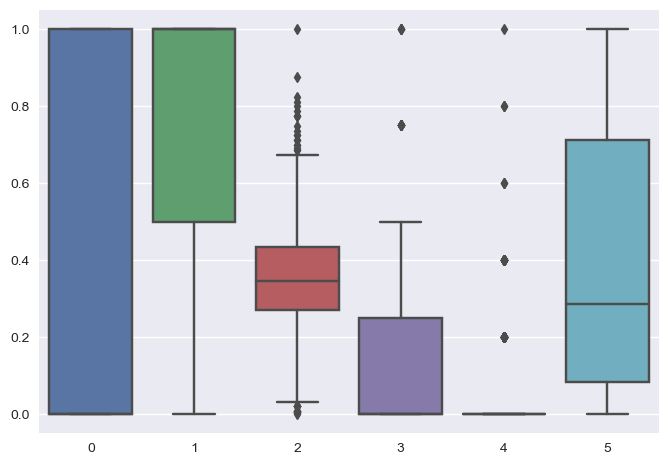

In [29]:
sns.boxplot(data=data_scaler)

# Categorical Columns

In [30]:
data_cat.columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [31]:
data_cat.isnull().sum()

Name          0
Sex           0
Ticket        0
Cabin       687
Embarked      2
dtype: int64

In [32]:
data_cat.Cabin.replace(np.nan,data_cat.Cabin.mode()[0],inplace = True)
data_cat.Embarked.replace(np.nan, data_cat.Embarked.mode()[0], inplace = True)

In [33]:
data_cat.isnull().sum()

Name        0
Sex         0
Ticket      0
Cabin       0
Embarked    0
dtype: int64

# Label Encoding

In [34]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data_cat=data_cat.apply(encoder.fit_transform)

In [35]:
data_cat

,Name,Sex,Ticket,Cabin,Embarked
0,108,1,523,47,2
1,190,0,596,81,0
2,353,0,669,47,2
3,272,0,49,55,2
4,15,1,472,47,2
...,...,...,...,...,...
886,548,1,101,47,2
887,303,0,14,30,2
888,413,0,675,47,2
889,81,1,8,60,0


In [36]:
data_f.shape

(443, 6)

In [37]:
data_cat.shape

(891, 5)

In [38]:
data_cat=data_cat.loc[data_f.index.values,:]

In [39]:
data_cat.shape

(443, 5)

# Concatenate Numerical Values and Categorical Values

In [40]:
d1=pd.DataFrame(data_scaler,columns=data_f.columns)
d1.reset_index(inplace=True)
data_cat.reset_index(inplace=True)
data_Final=pd.concat([d1,data_cat],axis=1)

# Final DataSet

In [41]:
data_Final

,index,Survived,Pclass,Age,SibSp,Parch,Fare,index,Name,Sex,Ticket,Cabin,Embarked
0,0,1.0,1.0,0.321438,0.00,0.0,0.000000,2,353,0,669,47,2
1,1,0.0,1.0,0.434531,0.00,0.0,0.005489,4,15,1,472,47,2
2,2,0.0,1.0,0.346569,0.00,0.0,0.023420,5,554,1,275,47,1
3,3,0.0,1.0,0.019854,0.75,0.2,0.577494,7,624,1,395,47,2
4,4,1.0,1.0,0.334004,0.00,0.4,0.140895,8,412,0,344,47,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,438,0.0,1.0,0.484795,0.00,1.0,0.931017,885,684,0,480,47,1
439,439,0.0,0.5,0.334004,0.00,0.0,0.222873,886,548,1,101,47,2
440,440,1.0,0.0,0.233476,0.00,0.0,0.969443,887,303,0,14,30,2
441,441,0.0,1.0,0.346569,0.25,0.4,0.681794,888,413,0,675,47,2


# Spliting the Dependent and Independent variables

In [42]:
y = data_Final[['Survived']]
x = data_Final.drop('Survived', axis = 1)

# Spliting the Data for Training(70%) and Testing(30%)

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 50)

# LogisticRegression Training Score

In [44]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
loc = regressor.fit(x_train, y_train)
loc.score(x_train,y_train)

0.8

# DecisionTreeClassifier Training Score

In [45]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
dec = classifier.fit(x_train, y_train)
dec.score(x_train,y_train)

0.8741935483870967

# RandomForestClassifier Training Score

In [46]:
from sklearn.ensemble import RandomForestClassifier
regressor = RandomForestClassifier(n_estimators = 50, max_depth = 3)
ran = regressor.fit(x_train, y_train)
ran.score(x_train,y_train)

0.864516129032258

# Model Validation

In [47]:
from sklearn.metrics import accuracy_score, r2_score

In [48]:
lr_y_pred = loc.predict(x_test)
dt_y_pred = dec.predict(x_test)
rf_y_pred = ran.predict(x_test)

# LogisticRegression Testing Score

In [49]:
accuracy_score(y_test,lr_y_pred)

0.6992481203007519

# DecisionTreeClassifier Testing Score

In [50]:
accuracy_score(y_test,dt_y_pred)

0.6842105263157895

# RandomForestRegressor Testing Score

In [51]:
accuracy_score(y_test,rf_y_pred)

0.7443609022556391